# Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
from matplotlib import pyplot as plt

# Data import

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Exploratory data Analysis




In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_test = [train, test]

### Sex

In [7]:
train[train['Survived'] == 1].groupby('Sex').count()['Survived'] / train.groupby('Sex').count()['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

- The women's survived rate is 74%, while the men's survived rate is just 18,8%





### Name

In [8]:
# Getting name title from "Name" column

def get_title(x):
  if "Mr." in str(x):
    return "Mr"
  elif "Mrs." in str(x):
    return "Mrs"
  elif "Miss." in str(x):
    return "Miss"
  elif "Master." in str(x):
    return "Master"
  else:
    return "Other"

for df in train_test:
  df['Name'] = df['Name'].apply(get_title)

train.head(6)




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,Mr,male,NaN,0,0,330877,8.4583,NaN,Q


<AxesSubplot:xlabel='Age', ylabel='Name'>

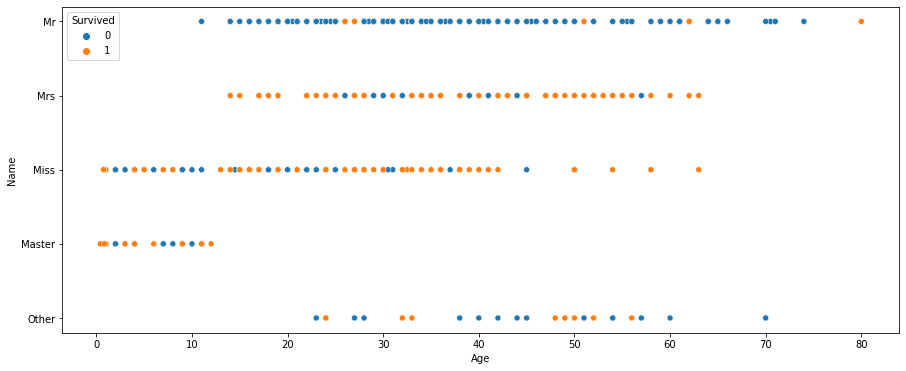

In [11]:
x = train['Age']
y = train['Name'] 
plt.figure(figsize=(15,6))
sns.scatterplot(x , y,hue = train['Survived'])


<AxesSubplot:xlabel='Name', ylabel='Survived'>

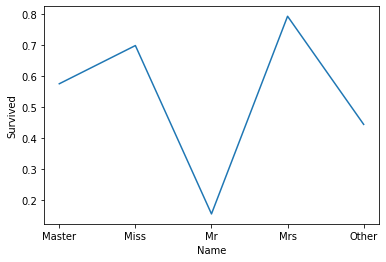

In [12]:
percentage = train[train['Survived'] == 1].groupby('Name').count()['Survived'] / train.groupby('Name').count()['Survived']
percentage = percentage.reset_index()
sns.lineplot(percentage['Name'],percentage['Survived'])

- The Chart confirms that women are more likely to survive than men. The "Mr" name title survived rate is less than 20% while the "Miss" and "Mrs" survived rate are more than 70%
- "Master" title refers to boys, they are slightly more likely to survive.

### Cabin

In [9]:
# Many NaN values on "Cabin", so I decided to drop this feature
for df in train_test:
  df.drop('Cabin',axis = 1, inplace = True)


### Age

In [10]:
# Filling missing ages by the median of ages by name title

for df in train_test:
  dic = {"Mr":df[df['Name'] == "Mr"]['Age'].median(),
  "Miss":df[df['Name'] == "Miss"]['Age'].median(),
  "Mrs":df[df['Name'] == "Mrs"]['Age'].median(),
  "Master":df[df['Name'] == "Master"]['Age'].median(),
  "Other":df[df['Name'] == "Other"]['Age'].median()}

  df["median"] = df['Name']
  df['median'] = df["median"].apply(lambda x: dic[x])

  df["Age"].fillna(df['median'],inplace = True)  
  df.drop("median",axis = 1, inplace = True)


In [11]:
# Age groups

def group_age(x):
  if x <= 20:
    return 0
  elif x > 20 and x <=40:
    return 2
  elif x > 40 and x <=60:
    return 3
  else:
    return 4
for df in train_test:
  df['Age'] = df['Age'].apply(group_age)


In [17]:
train['Age'].value_counts()

2    557
0    183
3    129
4     22
Name: Age, dtype: int64

In [12]:
train[train['Survived'] == 1].groupby('Age').count()['Survived'] / train.groupby('Age').count()['Survived']


Age
0    0.459016
2    0.364452
3    0.387597
4    0.227273
Name: Survived, dtype: float64

- Younger people are more likely to survive while older people are more likely to dead

### SibSp and Parch (Family members)

In [13]:
#Sum of Sibsp And parch

for df in train_test:
  df['Family'] = df['SibSp'] + df['Parch']
  df.drop(['SibSp','Parch'],axis = 1, inplace = True)

In [20]:
train.Family.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

In [14]:
train[train['Survived'] == 1].groupby('Family').count()['Survived'] / train.groupby('Family').count()['Survived']

Family
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7          NaN
10         NaN
Name: Survived, dtype: float64

- People with 1, 2 or 3 family members are more likely to survive

### Pclass

In [22]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [15]:
train[train['Survived'] == 1].groupby('Pclass').count()['Survived'] / train.groupby('Pclass').count()['Survived']


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

 - People in class 1 are more likely to survive than other
 - People in class 3 are more likely to dead than other

### Ticket

In [24]:
train['Ticket'].value_counts()

CA. 2343    7
1601        7
347082      7
3101295     6
347088      6
           ..
243880      1
315151      1
2664        1
248698      1
250643      1
Name: Ticket, Length: 681, dtype: int64

In [16]:
# Ticket type (by the 3 firsts numbers)
for df in train_test:
  df['Ticket'] = df['Ticket'].apply(lambda x: x[0:3])

In [17]:
ticket_frequence = train['Ticket'].value_counts().reset_index()
ticket_frequence[ticket_frequence['Ticket'] >= 20]

,index,Ticket
0,PC,60
1,349,53
2,347,48
3,113,47
4,C.A,28


In [18]:
def ticket(x):
  if x != "PC " and x != "349" and x != "347" and x != "113" and x != "C.A":
    return "Other"
  else:
    return x
for df in train_test:
  df['Ticket'] = df['Ticket'].apply(ticket)

In [28]:
train['Ticket'].value_counts()

Other    655
PC        60
349       53
347       48
113       47
C.A       28
Name: Ticket, dtype: int64

In [19]:
percentage_ticket = train[train['Survived'] == 1].groupby('Ticket').count()['Survived'] / train.groupby('Ticket').count()['Survived']
percentage_ticket = percentage_ticket.reset_index()
percentage_ticket.sort_values("Survived",ascending = False,inplace = True)
percentage_ticket.head(10)

,Ticket,Survived
5,PC,0.650000
0,113,0.468085
3,C.A,0.464286
4,Other,0.387786
1,347,0.229167
2,349,0.056604


- "PC" tickets indicates higher chance of survival
- "349" tickets indicates less chance of survival

### Fare

<AxesSubplot:xlabel='Fare'>

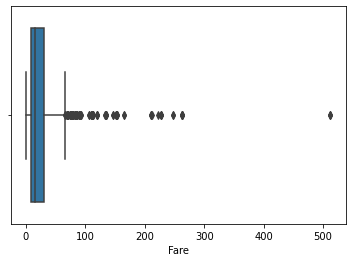

In [13]:
sns.boxplot(train['Fare'])

In [31]:
print(len(train[(train['Fare'] >= 80) & (train['Survived'] == 1)]) / len(train[train['Fare'] >= 80]))
print(len(train[(train['Fare'] <= 80) & (train['Survived'] == 1)]) / len(train[train['Fare'] <= 80]))

0.7763157894736842
0.3488372093023256


In [20]:
def fare (x):
  if x <= 20:
    return 0
  elif x > 20 and x <= 50:
    return 1
  elif x > 50 and x <=80:
    return 2
  else:
    return 3

for df in train_test:
  df['Fare'] = df['Fare'].apply(fare)

In [33]:
train['Fare'].value_counts()

0    515
1    216
2     86
3     74
Name: Fare, dtype: int64

In [22]:
train[train['Survived'] == 1].groupby('Fare').count()['Survived'] / train.groupby('Fare').count()['Survived']

Fare
0    0.277670
1    0.416667
2    0.604651
3    0.770270
Name: Survived, dtype: float64

- Fare is directly proportional to the survival rate

### Embarked

In [36]:
train[train['Survived'] == 1].groupby('Embarked').count()['Survived'] / train.groupby('Embarked').count()['Survived']

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

- People who embarked on C port are slightly more likely to survive

### NaN's

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    int64 
 6   Ticket       891 non-null    object
 7   Fare         891 non-null    int64 
 8   Embarked     889 non-null    object
 9   Family       891 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 69.7+ KB


In [38]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [39]:
for df in train_test:
  df['Embarked'] = df['Embarked'].fillna("S")
  
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    int64 
 6   Ticket       891 non-null    object
 7   Fare         891 non-null    int64 
 8   Embarked     891 non-null    object
 9   Family       891 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 69.7+ KB


### Replacing categorical features by numbers

In [40]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family
0,1,0,3,Mr,male,2,Other,0,S,1
1,2,1,1,Mrs,female,2,PC,2,C,1
2,3,1,3,Miss,female,2,Other,0,S,0
3,4,1,1,Mrs,female,2,113,2,S,1
4,5,0,3,Mr,male,2,Other,0,S,0


In [42]:
Embarked = {"S":0,"C":1,"Q":2}
Name = {"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Other":4}
Ticket = {"PC ":0,"349":1,"347":2,"113":3,"C.A":4, "Other":5}
Sex = {"male":0,"female":1}

for df in train_test:
  df['Sex'] = df["Sex"].apply(lambda x: Sex[x])
  df["Embarked"] = df["Embarked"].apply(lambda x: Embarked[x])
  df["Name"] = df["Name"].apply(lambda x: Name[x])
  df["Ticket"] = df["Ticket"].apply(lambda x: Ticket[x])



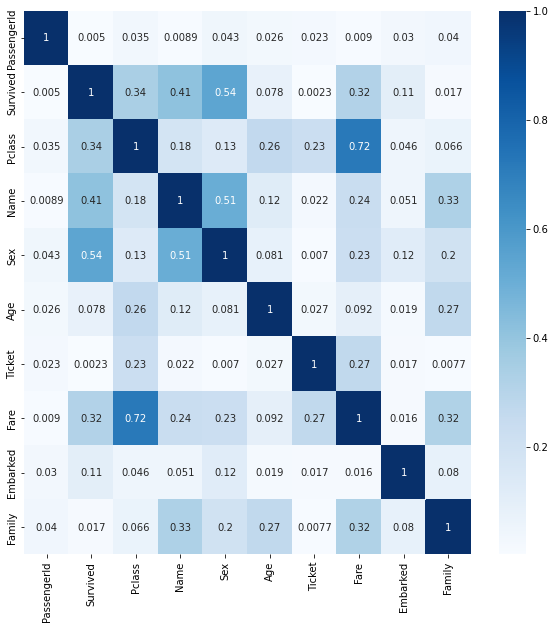

In [43]:
# Correlation Between the features

plt.figure(figsize=(10,10))
sns.heatmap(train.corr().abs(), annot = True, cmap = "Blues")


In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family
0,1,0,3,0,0,2,5,0,0,1
1,2,1,1,2,1,2,0,2,1,1
2,3,1,3,1,1,2,5,0,0,0
3,4,1,1,2,1,2,3,2,0,1
4,5,0,3,0,0,2,5,0,0,0


# Machine Learning

In [45]:
features = ['Pclass','Name','Sex','Age','Ticket','Fare','Embarked','Family']
X_train = train[features].copy()
X_test = test[features].copy()
y_train = train['Survived'].copy()


## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
clf_rf = RandomForestClassifier(n_estimators=500, max_depth=3, random_state=2)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=500, random_state=2)

In [48]:
results_rf = clf_rf.predict(X_test)
results_rf

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

## Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
clf_lr = LogisticRegression(random_state=0).fit(X_train, y_train)

In [51]:
results_lr = clf_lr.predict(X_test)
results_lr

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

# Export data

In [52]:
export_df = test.copy()
export_df['results'] = results_rf
export_df['results'].value_counts()

0    265
1    153
Name: results, dtype: int64

In [53]:
pred = export_df[['PassengerId','results']]
pred.head()

,PassengerId,results
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [54]:
pred.to_csv('my_submission.csv',header = ['PassengerId','Survived'], index=False)